# SD701 Data Mining
Par Pierre Dal Bianco et Nicolas Esdras

In [1]:
# we do our imports
import sklearn as sk
import numpy as np
from sklearn import cluster
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Partie 1 : exploration du dataset
Le jeu de données provient du site Kaggle : https://www.kaggle.com/tiagotgoz/predictive-useful-life-based-into-telemetry

Il contient 24h de cycle sur 100 machines avec des données de capteurs et des d'autres données sur l'état des machines. La liste exhaustive des colonnes est la suivante :
- machineID : ID de la machine
- datetime : Date de télémétrie
- timeincycles : Lecture de cycle
- voltmean24h : Moyenne télémétrique en volt des dernières 24h
- rotatemean24h : Moyenne télémétrique en rotation des dernières 24h
- pressuremean24h : Moyenne de télémétrie de pression des dernières 24h
- vibrationmean24h : Moyenne de télémétrie de vibration des dernières 24h
- voltsd24h : Écart-type de télémétrie Volt des dernières 24h
- rotatesd24h : Rotation de l'écart-type de télémétrie des dernières 24h
- pressuresd24h : Écart-type de télémétrie de pression des dernières 24h
- vibrationsd24h : Écart-type de télémétrie de vibration des dernières 24h
- voltmean5d : Moyenne télémétrique en volt des 5 derniers jours
- rotatemean5d : Faire pivoter la moyenne télémétrique des 5 derniers jours
- pressuremean5d : Moyenne de télémétrie de pression des 5 derniers jours
- vibrationmean5d : Moyenne de télémétrie de vibration des 5 derniers jours
- voltsd5d : Écart type de télémétrie Volt des 5 derniers jours
- rotatesd5d : Rotation de l'écart type de télémétrie des 5 derniers jours
- Pressuresd5d : Écart-type de télémétrie de pression des 5 derniers jours
- vibrationsd5d : Écart-type de télémétrie de vibration des 5 derniers jours
- error1 : Identification de l'erreur 1
- error2 : Identification de l'erreur 2
- error3 : Identification de l'erreur 3
- error4 : Identification de l'erreur 4
- error5 : Identification de l'erreur 5
- comp1 : Cycle de maintenance du composant 1
- comp2 : Cycle de maintenance du composant 2
- comp3 : Cycle de maintenance du composant 3
- comp4 : Cycle de maintenance du composant 4
- model : Modèle de machine
- age : Âge de la machine
- RUWeek : Temps en semaines pour l'échec
- failure : Identification du composant qui a échoué
- failed : Échec ou non
- RUL : Durée de vie utile restante en cycles par panne et machine
- RUL_I : RUL inverse 

On constate qu'il existe un nombre important de colonnes dans notre jeu de données. Cependant un certain nombre de variables sont calculées à partir d'autres variables. Nous allons surtout nous concentrer sur les variables ```voltsd_24h```, ```rotatesd_24h```, ```pressuresd_24h```, ```vibrationsd_24h```, ```time_in_cycles```, ```error1```, ```error2```, ```error4```, ```error5```, ```age``` et biensûr la variable que nous cherchons à expliquer ```failure```. En effect ce sont des variables correspondant à des mesures que nous pouvons espérer rencontrer dans la plupart des données provenant de cycles industriels.

In [2]:
# we read the csv file
data = pd.read_csv("ALLtrainMescla5D.csv.zip")

# we convert the failure variable into a number which represents the type of failure with 0 = no failure
data['failure'] = data['failure'].map({'none':0, 'comp1':1,  'comp2':2,  'comp3':3,  'comp4':4})

# we convert the datetime column into a datetime data type
data['datetime'] = data['datetime'].apply(lambda d: datetime.datetime.strptime(d, '%Y-%m-%d'))
data = data.sort_values('datetime', ignore_index=True)
data.head()

,machineID,datetime,time_in_cycles,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,...,comp3,comp4,model,age,DI,RULWeek,failure,failed,RUL,RUL_I
0,2,2015-01-05,1,170.983586,458.211435,102.630291,41.655238,16.170897,48.399526,10.206313,...,0.0,0.0,model4,7,2.673599,1.0,0,0,1.0,73.0
1,78,2015-01-05,1,171.244562,443.428047,101.368139,40.974623,14.591701,55.864090,10.820901,...,0.0,0.0,model4,19,0.000000,1.0,0,0,1.0,31.0
2,55,2015-01-05,1,171.563096,451.281569,100.017165,39.139113,13.238429,61.624450,9.798919,...,0.0,0.0,model3,17,2.653564,1.0,0,0,1.0,61.0
3,80,2015-01-05,1,166.681888,470.366849,97.964395,38.602278,15.099637,52.184320,7.630042,...,0.0,0.0,model3,6,2.686396,1.0,0,0,1.0,188.0
4,34,2015-01-05,1,171.702752,437.086634,120.063679,40.315629,10.279047,47.538413,13.112419,...,0.0,0.0,model4,10,2.692270,1.0,0,0,1.0,101.0


Est-ce que nous avons les types de données attendues ?

In [3]:
# let's check the types
data.dtypes

machineID                     int64
datetime             datetime64[ns]
time_in_cycles                int64
voltmean_24h                float64
rotatemean_24h              float64
pressuremean_24h            float64
vibrationmean_24h           float64
voltsd_24h                  float64
rotatesd_24h                float64
pressuresd_24h              float64
vibrationsd_24h             float64
voltmean_5d                 float64
rotatemean_5d               float64
pressuremean_5d             float64
vibrationmean_5d            float64
voltsd_5d                   float64
rotatesd_5d                 float64
pressuresd_5d               float64
vibrationsd_5d              float64
error1                      float64
error2                      float64
error3                      float64
error4                      float64
error5                      float64
comp1                       float64
comp2                       float64
comp3                       float64
comp4                       

Combien de machines différentes est-ce que nous avons ?

In [4]:
print('{} valeurs uniques entre {} et {}'.format(data['machineID'].nunique(), data['machineID'].min(), data['machineID'].max()))

98 valeurs uniques entre 1 et 100


Il semble qu'il y ait deux ID inexistants puisqu'on a 98 valeurs entre 1 et 100, essayons de les identifier

In [5]:
# this returns the elements missing, we are hoping to find none
print('Les deux valeurs manquantes sont {}'.format(set(range(1, 100)) - set(data['machineID'].unique())))

Les deux valeurs manquantes sont {77, 6}


Quel est l'age moyen de chaque machine ?

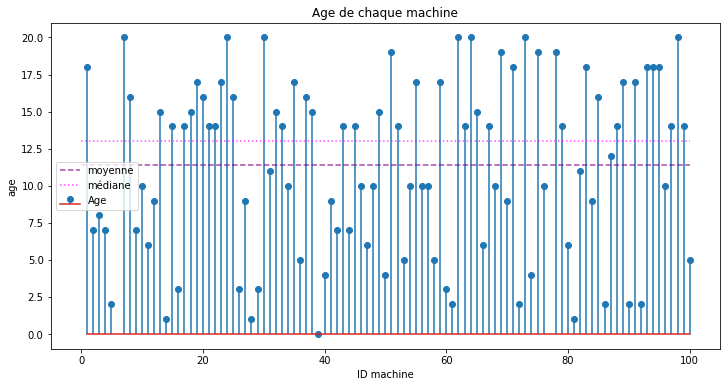

In [6]:
plt.figure(figsize=(12,6))
machines_age = data.groupby('machineID')['age'].mean()
plt.stem(machines_age.index, machines_age, label='Age');
plt.hlines(machines_age.mean(), xmin=0, xmax=100, linestyle='dashed', color='purple', alpha=0.7, label='moyenne')
plt.hlines(machines_age.median(), xmin=0, xmax=100, linestyle = 'dotted', color='magenta', alpha=0.7, label='médiane')
plt.xlabel('ID machine')
plt.ylabel('age')
plt.title('Age de chaque machine');
plt.legend();

Les mesures ont été réalisées sur quelle période de temps ?

In [7]:
print('Première mesure : {}'.format(data['datetime'].min()))
print('Durée totale des mesures : {}'.format((data['datetime'].max() - data['datetime'].min())))

Première mesure : 2015-01-05 00:00:00
Durée totale des mesures : 360 days 00:00:00


Y-a-t-il des dates manquantes dans les mesures ?

In [8]:
# this returns the elements missing, we are hoping to find none
pd.date_range(start = data['datetime'].min(), end = data['datetime'].max(), freq='d').difference(data['datetime'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

Y-a-t-il des duplicats ?

In [9]:
data.duplicated().any()

False

Y-a-t-il des valeurs nulles / na ?

In [10]:
data.isna().any().any()

False

Affichons quelques graphes sur les données de mesures ```voltsd_24h```, ```rotatesd_24h```, ```pressuresd_24h```, et ```vibrationsd_24h``` sur 4 machines tirées aléatoirement pour voir à quoi cela ressemble

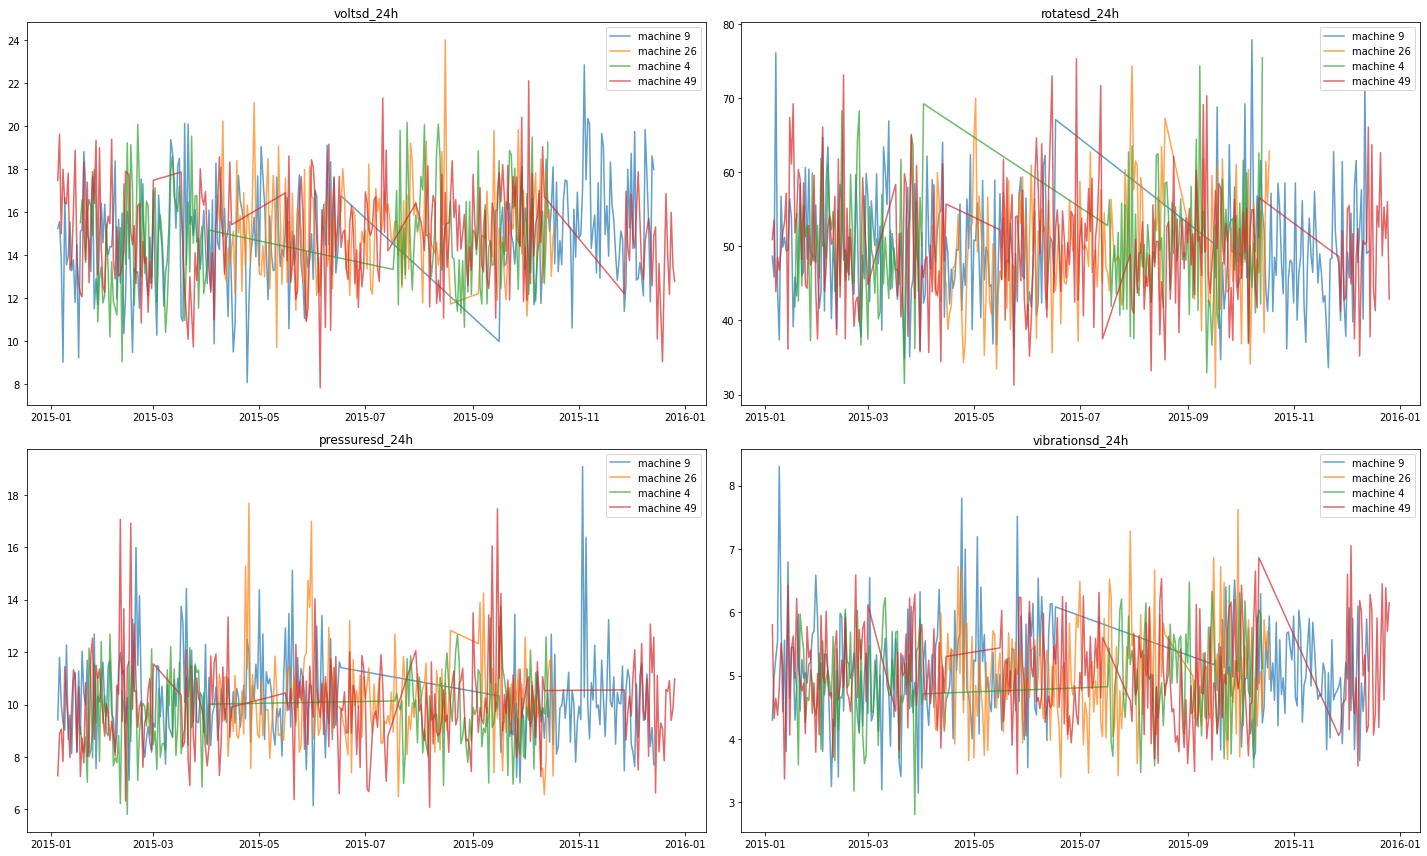

In [11]:
# we prepare our plot
fig = plt.figure(figsize=(20, 12));
k = 1

machineID = np.random.choice(data['machineID'].unique(), 4)
columns_graph = ['voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h']

# for each column
for col in columns_graph:
    # we add a subplot
    ax = fig.add_subplot(2, 2, k)
    # we plot the categories in each subplot
    for id in machineID:
        ax.plot(data.loc[data['machineID'] == id, 'datetime'],
                data.loc[data['machineID'] == id, col],
                label = 'machine ' + str(id), alpha=0.7);
        ax.set_title(col);
    #ax.autoscale(axis='x',tight=True);
    ax.legend();
    k+=1
fig.tight_layout()

Il semble y avoir des données lissées sur plusieurs jours, nous allons voir si cela a un impacte sur nos prédictions. Essayons de voir l'évolution des différentes grandeurs numériques au cours du temps. Nous allons rajouter le nombre de pannes en arrière plan de chaque graphique.

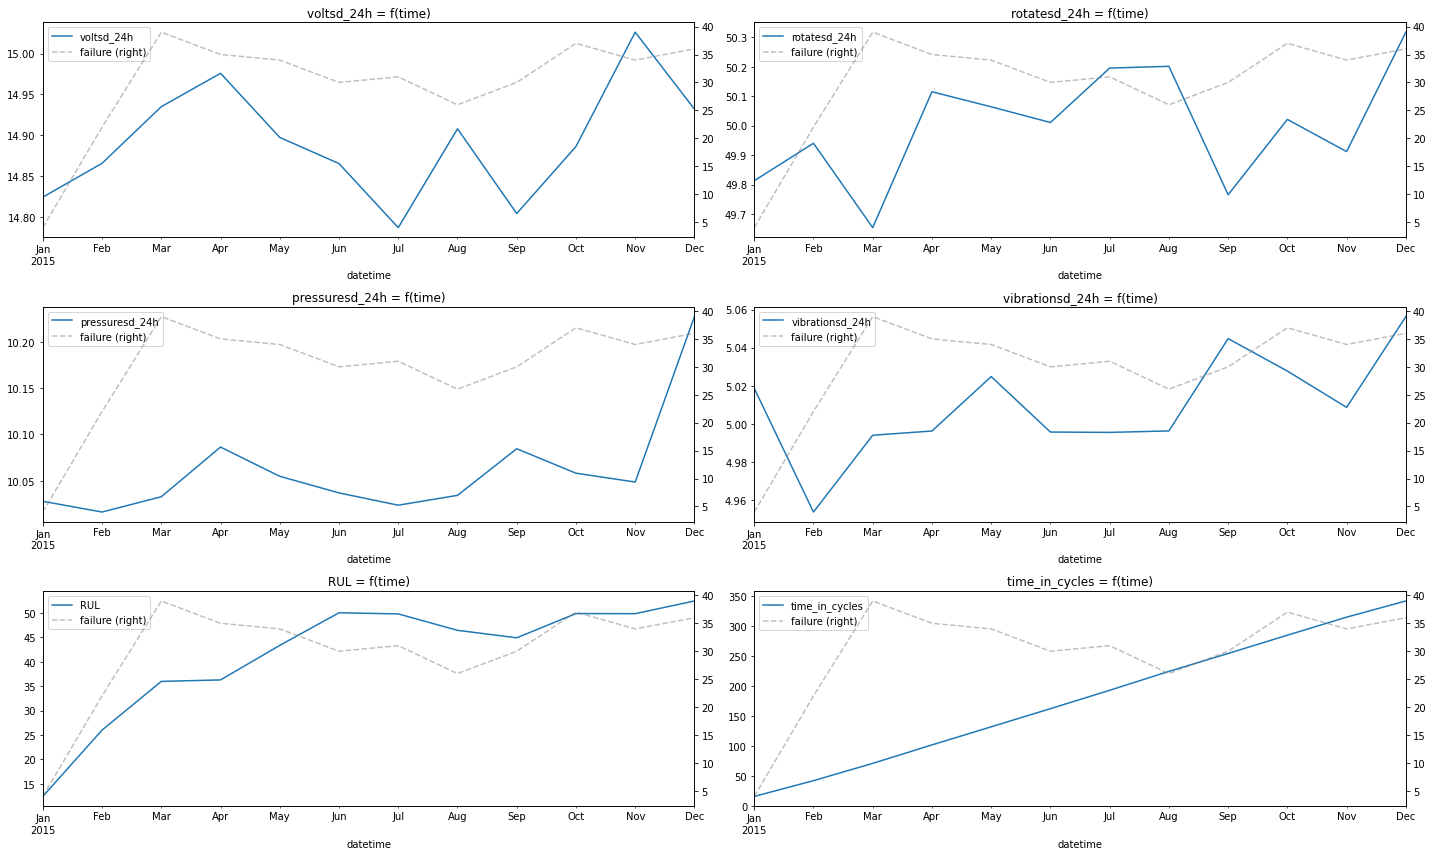

In [12]:
columns_graph = ['voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'RUL', 'time_in_cycles']
data_resampled = data.resample(rule='M', on='datetime').mean()[columns_graph].interpolate(method='linear')
data_failure_resampled = data[data['failure'] > 0].resample(rule='M', on='datetime').count()['failure'].interpolate(method='linear')

# we prepare our plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

k=0
# we plot the column data in each subplot
for i in range(3):
    for j in range(2):
        data_resampled[columns_graph[k]].plot(ax=axes[i,j], legend=columns_graph[k]);
        data_failure_resampled.plot(secondary_y=True, ax=axes[i,j], legend='failures count', alpha=0.5, linestyle='dashed', color='gray');
        axes[i,j].set_title(columns_graph[k]+' = f(time)')
        k+=1
fig.tight_layout();

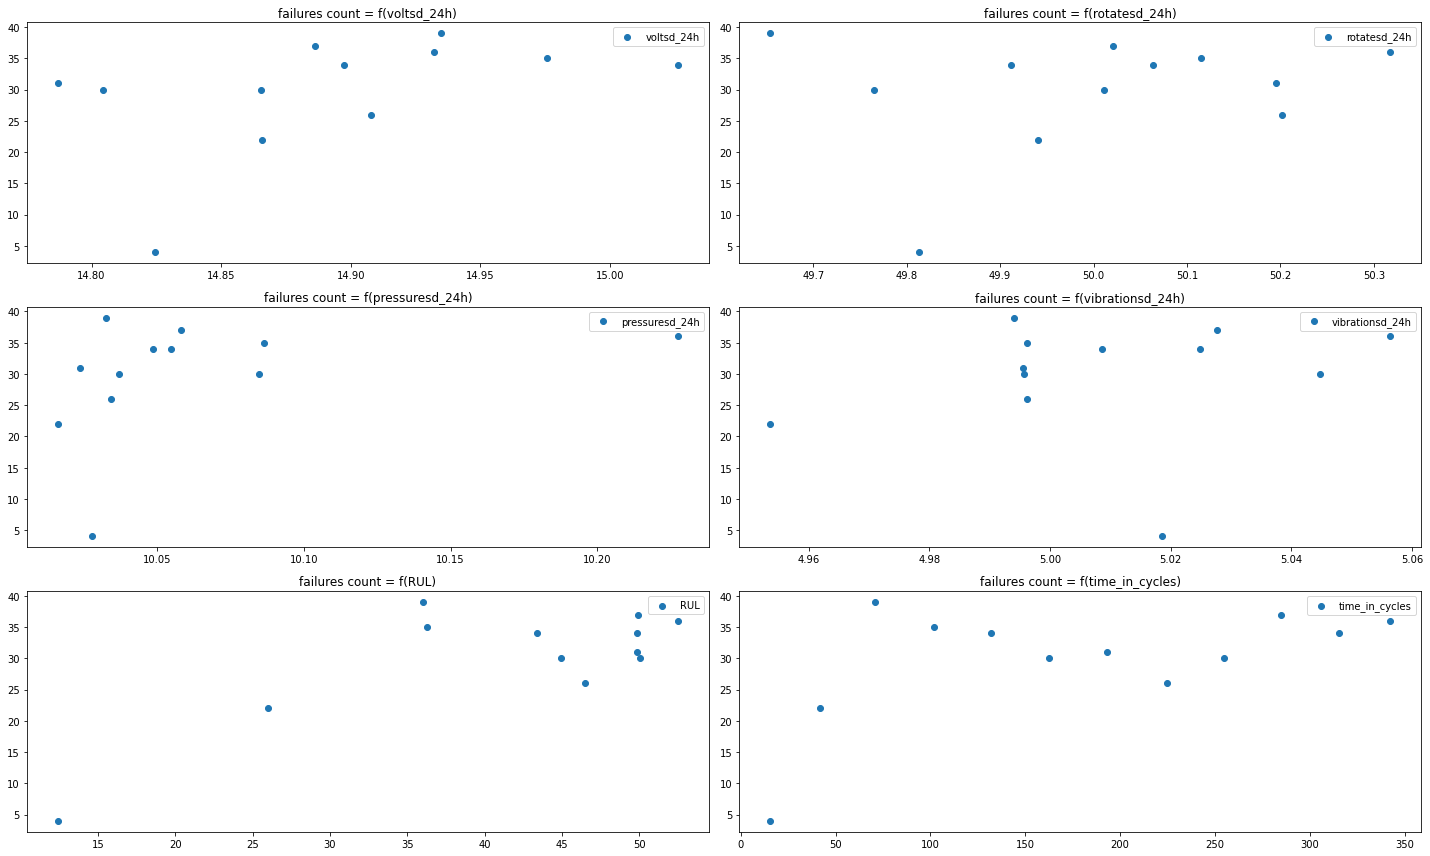

In [13]:
columns_graph = ['voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'RUL', 'time_in_cycles']
data_resampled = data.resample(rule='M', on='datetime').mean()[columns_graph].interpolate(method='linear')
data_failure_resampled = data[data['failure'] > 0].resample(rule='M', on='datetime').count()['failure'].interpolate(method='linear')

# we prepare our plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

k=0
# we plot the column data in each subplot
for i in range(3):
    for j in range(2):
        axes[i,j].scatter(x=data_resampled[columns_graph[k]], y=data_failure_resampled, label=columns_graph[k]);
        #data_failure_resampled.plot(secondary_y=True, ax=axes[i,j], legend='failures count', alpha=0.5, linestyle='dashed', color='gray');
        axes[i,j].set_title('failures count = f('+ columns_graph[k] +')')
        axes[i,j].legend()
        k+=1
fig.tight_layout();

On peut aussi tracer un histogramme du nombre de panne par type de panne, pour voir s'il y a un type qui apparaît plus souvent. Nous allons tracer la même chose avec le nombre d'erreurs.

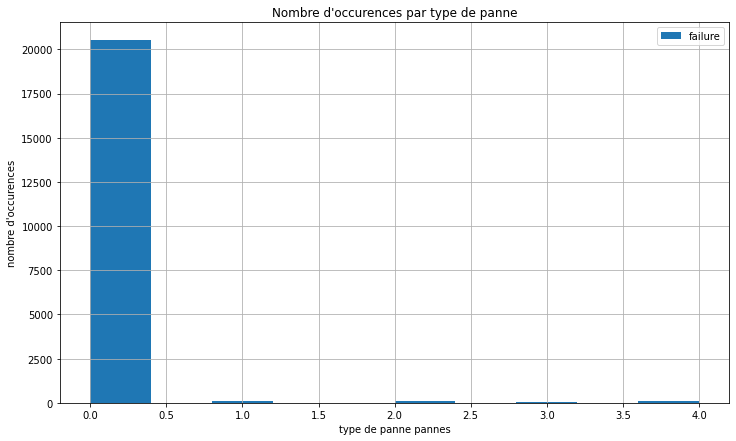

In [14]:
# we prepare our plot
data['failure'].hist(figsize=(12, 7), legend='failure');
plt.xlabel('type de panne pannes')
plt.ylabel('nombre d\'occurences')
plt.title('Nombre d\'occurences par type de panne')
plt.legend();

In [15]:
print('Pourcentage de la classe 0 par rapport aux autres classes : {:.2%}'.format(1 - data.loc[data['failure'] > 0, 'failure'].count()/data['failure'].count()))

Pourcentage de la classe 0 par rapport aux autres classes : 98.28%


On constate déjà une grosse disparité entre les classes et notamment la classe 0 qui correspond au cas où il n'y a pas de pannes (ie fonctionnement normal) psuique la classe 0 représente plus de 98% des effectifs de classe. Il faudrait donc s'orienter vers des algorithmes capable de gérer ces grosses disparités. En complément, on pourra essayer de regrouper tous les échecs dans une même catégorie dans un premier temps afin d'augmenter l'effectif de la classe pour faire classification en deux temps : échec? (True ou False) puis quel type d'échec si failure=True.

On constate cependant qu'il semble y avoir un lien entre le nombre d'erreurs et le nombre de pannes.

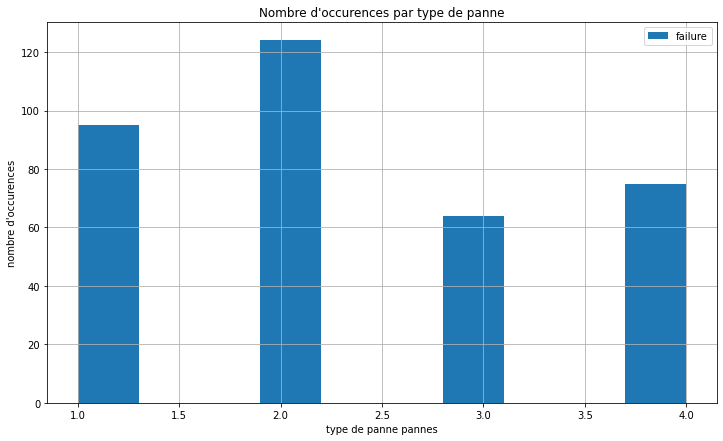

In [16]:
data['failure'][data['failure'] > 0].hist(figsize=(12, 7), legend='failure');
plt.xlabel('type de panne pannes')
plt.ylabel('nombre d\'occurences')
plt.title('Nombre d\'occurences par type de panne');

Affichons un histogramme du nombre d'erreurs simultanées

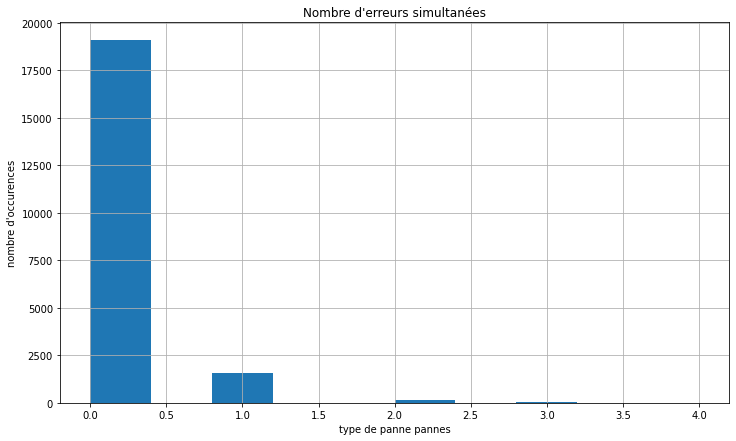

In [17]:
# we prepare our plot
(data['error1']+data['error2']+data['error3']+data['error4']).hist(figsize=(12, 7));
plt.xlabel('type de panne pannes');
plt.ylabel('nombre d\'occurences');
plt.title('Nombre d\'erreurs simultanées');

Le type d'échec une fois la classe 0 (pas d'échec) retirée : les classes échec sont réparties à peu près uniformément à première vue.

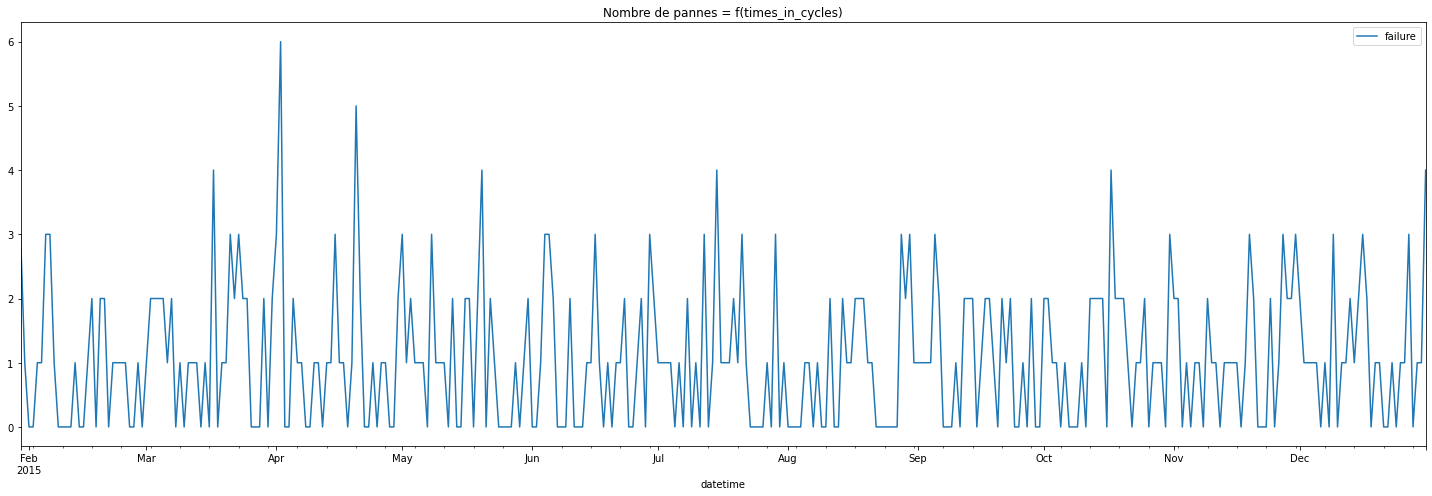

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
data[data['failure'] > 0].resample(rule='D', on='datetime').count()['failure'].interpolate(method='linear').plot(legend='failures', ax=ax);
#ax.set_xticks(np.arange(0, 360, 10));
ax.set_title('Number of failures = f(time)');
ax.legend()
ax.set_title('Nombre de pannes = f(times_in_cycles)');
fig.tight_layout()

Observons comment les différentes covariables intéragissent entre elles et avec la variable à expliquer.

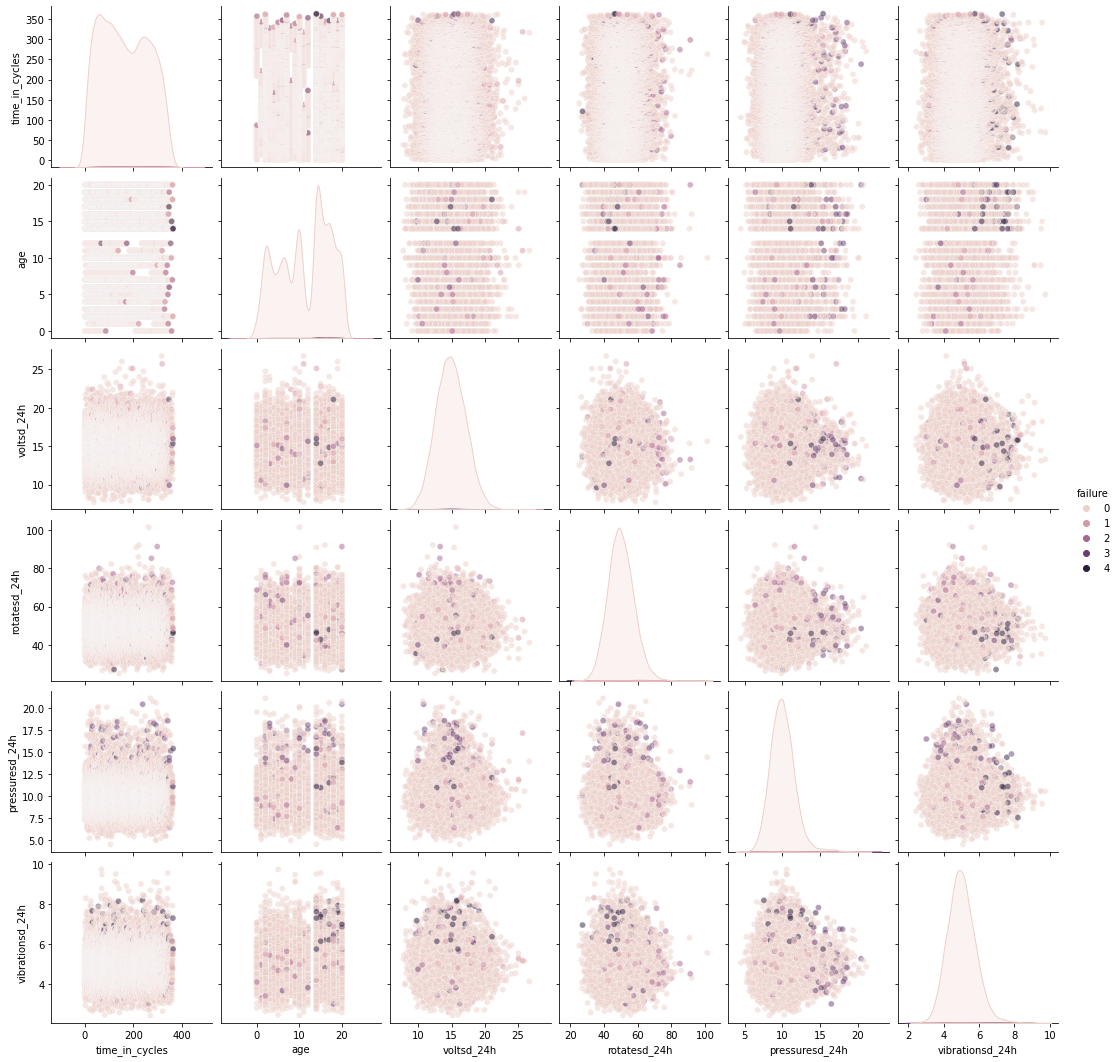

In [19]:
num_columns = ['time_in_cycles', 'age',
               'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h',
               'failure']
sns.pairplot(data[num_columns], hue='failure', plot_kws={'alpha':0.5});

Observons les mêmes graphes sans la classe failure = 0.

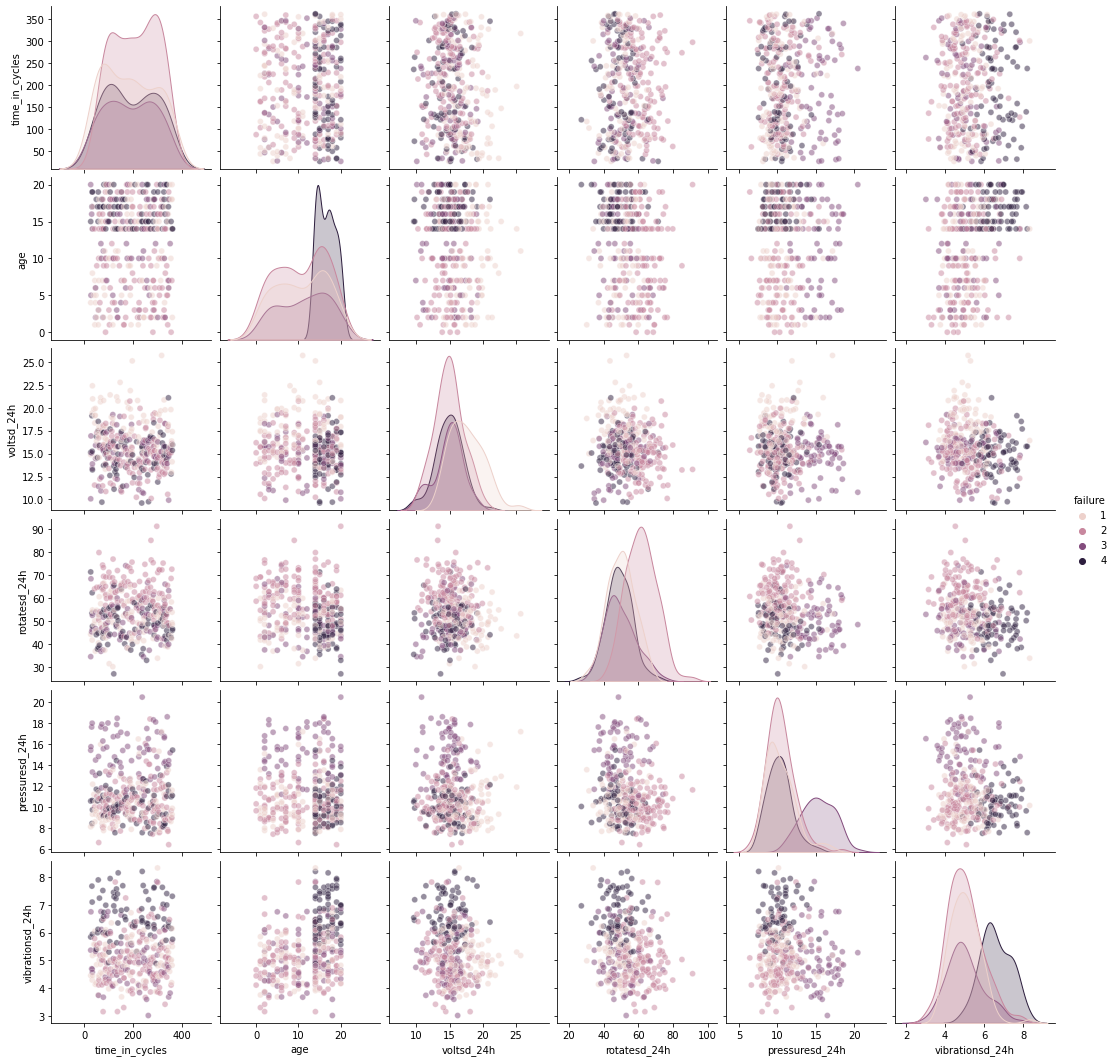

In [20]:
num_columns = ['time_in_cycles', 'age',
               'voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h',
               'failure']
sns.pairplot(data.loc[data['failure'] > 0, num_columns], hue='failure', plot_kws={'alpha':0.5});

# Partie 2 : Classification

## 1. Préparation des données

Commençons par préparer nos données pour appliquer des algorithmes de classification. Nous allons isoler les colonnes qui nous intéressent et nous allons les normaliser.

In [21]:
# on commence par isoler les colonnes qui nous intéressent
num_cols = ['voltsd_24h', 'rotatesd_24h', 'pressuresd_24h', 'vibrationsd_24h', 'time_in_cycles', 'age']
oh_cols = ['error1', 'error2', 'error4', 'error5']

data_norm = data[num_cols + oh_cols + ['failure']].copy()

data_norm.head()

,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,time_in_cycles,age,error1,error2,error4,error5,failure
0,16.170897,48.399526,10.206313,3.609326,1,7,0.0,0.0,0.0,0.0,0
1,14.591701,55.864090,10.820901,4.028720,1,19,0.0,0.0,0.0,0.0,0
2,13.238429,61.624450,9.798919,3.963220,1,17,0.0,0.0,0.0,0.0,0
3,15.099637,52.184320,7.630042,4.352634,1,6,0.0,0.0,0.0,0.0,0
4,10.279047,47.538413,13.112419,4.943655,1,10,0.0,0.0,0.0,0.0,0


Ensuite nous allons découper notre jeu de données pour avoir un jeu d'entrainement et un jeu de test.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_norm[num_cols + oh_cols], data_norm['failure'], test_size=0.2)

Nous pouvons normaliser nos données d'entrainement et de test.

In [23]:
from sklearn.preprocessing import StandardScaler

# on fit le scaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,time_in_cycles,age,error1,error2,error4,error5
15579,-0.399368,-0.512166,-0.113390,-0.371100,0.840452,0.967766,0.0,0.0,0.0,0.0
16407,1.053826,-0.501433,1.154248,0.280345,0.975763,1.475017,0.0,0.0,0.0,0.0
6241,0.104523,0.638728,-0.005118,-0.436298,-0.710414,0.460515,0.0,0.0,0.0,0.0
20453,1.677736,-0.202961,0.767047,-1.557611,1.798034,0.629599,0.0,0.0,0.0,1.0
1171,0.941439,-1.093892,-0.763713,2.058441,-1.459826,0.798683,0.0,0.0,0.0,0.0


Au vu de la disparité des classes, nous allons également créer un jeu de données avec un effectif réduit pour la classe 0. On fixe effective de la classe 0 = effectif de toutes les autres classes x 2. Ce choix est arbitraire, il serait de plus intéressant de le faire varier.

In [45]:
nb_failures = X_train.join(y_train)[X_train.join(y_train)['failure'] > 0].shape[0]
data_train_reduced = X_train.join(y_train)[X_train.join(y_train)['failure'] > 0].append(X_train.join(y_train)[X_train.join(y_train)['failure'] == 0].sample(n=nb_failures*2))
X_train_reduced, y_train_reduced = data_train_reduced.iloc[:, :-1], data_train_reduced.iloc[:, -1]

# 2. Classification

Le choix de la metrique d'évaluation est important pour la suite afin de pouvoir comparer les différents algorithmes. Dans notre cas, nous voulons surtout éviter les faux négatifs. Dans ce genre de situation on définie le score $F_\beta$ comme suit :
$$
F_\beta = (1+\beta^2) \frac{precision \cdot recall}{(\beta^2 \cdot precision + recall)}
$$

Une valeur usuelle pour privilégier le taux de recalls est $\beta$ = 2. Dans la suite nous allons donc utiliser cette métrique, ainsi que la métrique pour $\beta$ = 1 (F-score équilibré) à titre de comparaison.

Pour plus d'informations sur le F-score : [Documentation officielle de Sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)

### Clustering : $k$-means

Un premier algorithme vu en classe est le k-means. Par curiosité essayons de tracer la courbe du coude vue en classe pour tenter d'identifier la meilleure valeur de k. Ici nous avons déjà un objectif sur le nombre de classes, mais nous pouvons quand même essayer pour voir à quoi cela ressemble sur notre jeu de données.

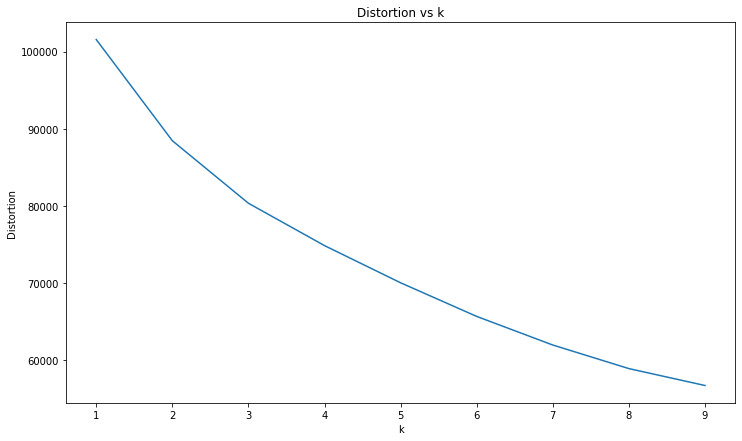

In [50]:
elbow_scores = []

# on prend une valeur de k entre 1 et 10
for k in range(1, 10):
    # On fait touner le k-means pour chaque valeur de k
    kmeans_algo = cluster.KMeans(n_clusters=k)
    kmeans_results = kmeans_algo.fit_transform(X_train)
    
    # on fait une liste des scores
    elbow_scores.append(kmeans_algo.inertia_)

# On affiche nos score en fonction de k
plt.figure(figsize=(12, 7));
plt.plot(list(range(1, 10)), elbow_scores, label='scores')
plt.xlabel("k");
plt.ylabel("Distortion");
plt.title('Distortion vs k');

On ne constate pas de coude évident, ce qui laisse présager qu'il sera difficile de classer nos données en plusieurs classes. Essayons de faire touner un k-means avec 5 clusters pour voir si l'algorithme arrive a découper le jeu de données entre les 5 classes : 1 classe pour pas d'échec, et 4 classes pour les 4 types d'échec

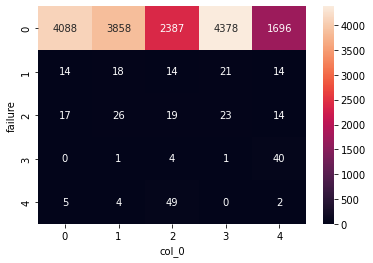

In [38]:
# on applique l'algorithme k-means
#on essaie d'identifier 5 groupes
kmeans_algo = cluster.KMeans(n_clusters=5)
kmeans_results = kmeans_algo.fit_transform(X_train)

# on peut afficher une heatmap pour émuler une matrice de confusion
sns.heatmap(pd.crosstab(y_train, kmeans_algo.labels_), annot=True, fmt='d');

Comme prévu l'algorithme ne présente pas de très bon résultats. Tournons-nous vers des algorithmes plus adaptés à notre problème.

### Classifieurs Ensemblistes
### 1. Random Forest Classifier

Un premier classifieur que nous pouvons essayer sur notre jeu de données est le Random 

Fb score avec X_train: 0.20
Fb score avec X_train_reduced: 0.35


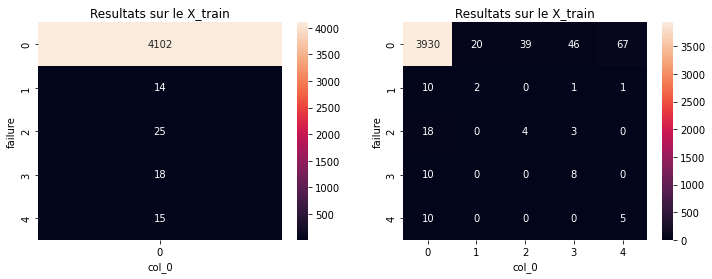

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score

rf_classifier = RandomForestClassifier(n_estimators=200)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

fig = plt.figure(figsize=(12,4))
axes = fig.subplots(nrows=1, ncols=2)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', ax=axes[0]) ;
axes[0].set_title('Resultats sur le X_train');
print('Fb score avec X_train: {:.2f}'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

rf_classifier.fit(X_train_reduced, y_train_reduced)
y_pred = rf_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', ax=axes[1]);
axes[1].set_title('Resultats sur le X_train');

print('Fb score avec X_train_reduced: {:.2f}'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

Nous n'obtenons pas un bon score, le classifieur attribue pricipalement voire exclusivement chaque point à la classe majoritaire 0. Ce classifieur ne semble pas adapté dans notre cas comme nous avons des classes fortement déséquilibrées. Il retourne cependant de meilleurs résultats le les données d'entrainement avec un effectif de classe 0 réduit.

### Classifieurs Ensemblistes
### 2. Gradient Boosting Classifier

C'est le classifieur qui semble être privilégié d'après la litérature.

Fb score avec X_train: 0.22
Fb score avec X_train_reduced: 0.05


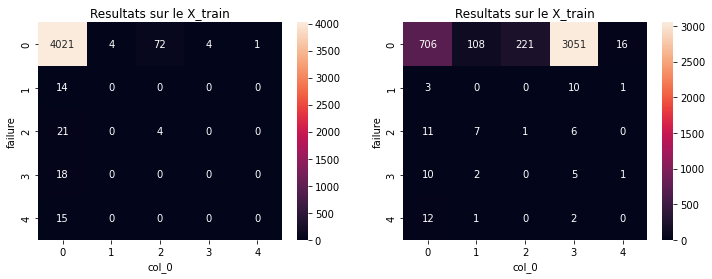

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_classifier = GradientBoostingClassifier(n_estimators=150, learning_rate=1.5, max_depth=3)
gbc_classifier.fit(X_train, y_train)
y_pred = gbc_classifier.predict(X_test)

fig = plt.figure(figsize=(12,4))
axes = fig.subplots(nrows=1, ncols=2)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', ax=axes[0]) ;
axes[0].set_title('Resultats sur le X_train');
print('Fb score avec X_train: {:.2f}'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

gbc_classifier.fit(X_train_reduced, y_train_reduced)
y_pred = gbc_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', ax=axes[1]);
axes[1].set_title('Resultats sur le X_train');

print('Fb score avec X_train_reduced: {:.2f}'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

Ce classifieur retourne un très mauvais score, il possède de plus de nombreux paramètres à ajuster, ce qui peut s'avérer délicat à optimiser. Le fait de réduire le nombre d'occurences de la classe dominante semble améliorer la matrice de confusion (plus de valeurs diagonales) mais le score global n'est pas très affecté voire pire dans certains cas que le score obtenu avec le jeu de données complet.

### Classifieur naïf : Gaussian Naive Bayes 

Essayons de classifier nos données à l'aide du classifieur Gaussian Naive Bayes. Ce classifeur possède un paramètre 'smoothing' à ajuster. Nous allons essayer plusieurs valeurs de ce paramètre pour voir quelle valeur retourne le meilleur score.

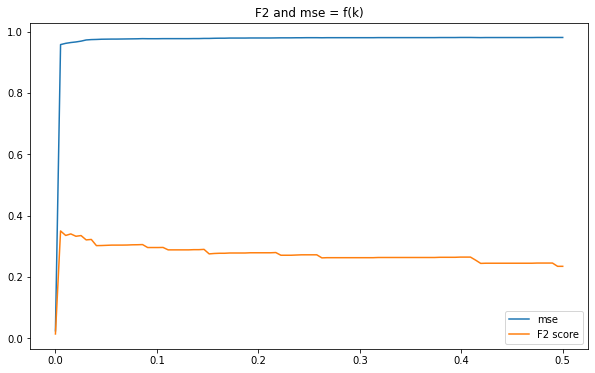

Meilleur Fb score : 0.35 optenu pour s = 0.01


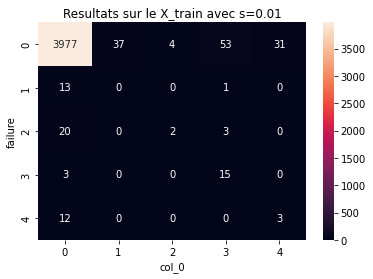

In [41]:
from sklearn.naive_bayes import GaussianNB

f2_score = []
score = []
s_range = np.linspace(1e-9, 0.5, num=100)
for s in s_range:
    gnb_classifier = GaussianNB(var_smoothing=s)
    gnb_classifier.fit(X_train, y_train)
    y_pred = gnb_classifier.predict(X_test)

    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(gnb_classifier.score(X_test, y_test))

plt.figure(figsize=(10, 6));
plt.plot(s_range, score, label='mse');
plt.plot(s_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();

best_s = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour s = {:.2f}'.format(f2_score[best_s], s_range[best_s]))

gnb_classifier = GaussianNB(var_smoothing=s_range[best_s])
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');
plt.title('Resultats sur le X_train avec s={:.2f}'.format(s_range[best_s]));

Ce classifeur présente un score relatvement bon comparé à ceux testés jusqu'ici. Essayons de faire la même chose avec les données réduites.

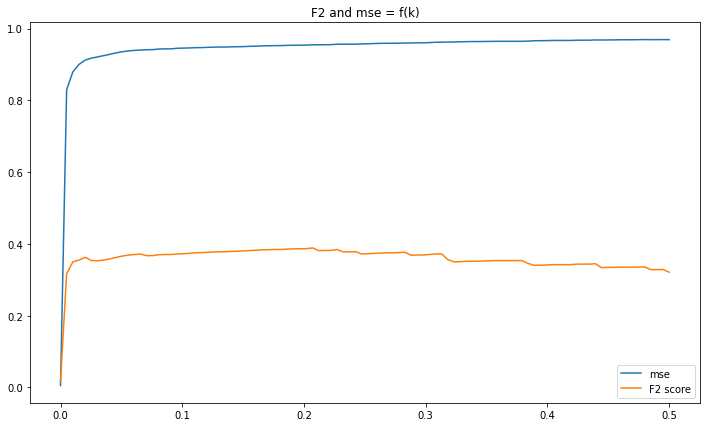

Meilleur Fb score : 0.39 optenu pour s = 0.21


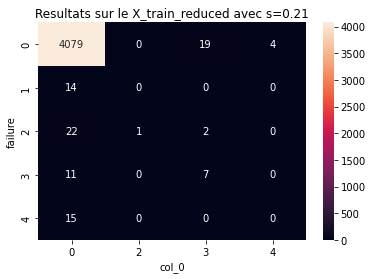

In [42]:
f2_score = []
score = []
s_range = np.linspace(1e-9, 0.5, num=100)
for s in s_range:
    gnb_classifier = GaussianNB(var_smoothing=s)
    gnb_classifier.fit(X_train_reduced, y_train_reduced)
    y_pred = gnb_classifier.predict(X_test)

    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(gnb_classifier.score(X_test, y_test))

plt.figure(figsize=(12, 7));
plt.plot(s_range, score, label='mse');
plt.plot(s_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();

best_s = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour s = {:.2f}'.format(f2_score[best_s], s_range[best_s]))

gnb_classifier = GaussianNB(var_smoothing=s_range[best_s])
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');
plt.title('Resultats sur le X_train_reduced avec s={:.2f}'.format(s_range[best_s]));

On constate une amélioration des résultats avec le jeu réduit ce qui est intéressant. C'est l'algorithme qui permet d'atteindre le meilleur score jusqu'à maintenant.

### Classifieurs non linéaires
### 1. K-Voisins

Essayons de classifier nos données à l'aide de la méthode des plus proches voisins

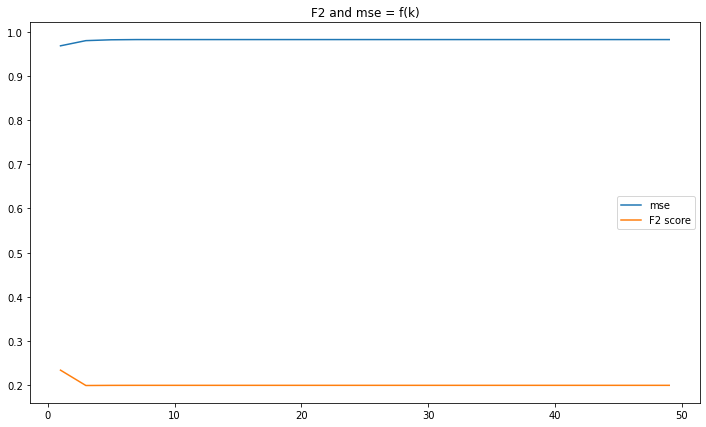

Meilleur Fb score : 0.23 optenu pour n = 1.00


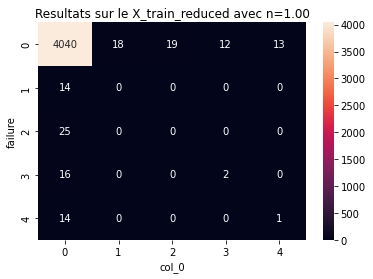

In [51]:
from sklearn.neighbors import KNeighborsClassifier

f2_score = []
score = []
n_range = range(1, 50, 2)
for n in n_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(knn_classifier.score(X_test, y_test))

plt.figure(figsize=(12, 7));
plt.plot(n_range, score, label='mse');
plt.plot(n_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();

best_n = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour n = {:.2f}'.format(f2_score[best_n], n_range[best_n]))

knn_classifier = KNeighborsClassifier(n_neighbors= n_range[best_n], weights='distance')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');
plt.title('Resultats sur le X_train_reduced avec n={:.2f}'.format(n_range[best_n]));

Le meilleur score est obtenu pour n = 1, ce qui est souvent le cas avec cet algorithme. C'est la valeur qui minimise le biais. Voyons comme le classifieur se comporte avec le jeu de données réduit.

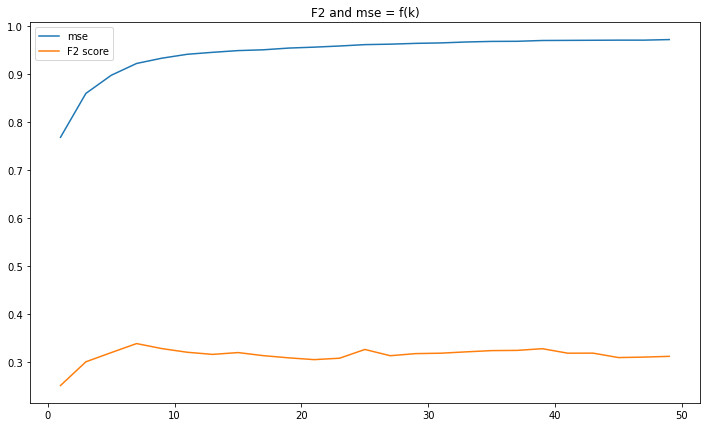

Meilleur Fb score : 0.34 optenu pour n = 7.00


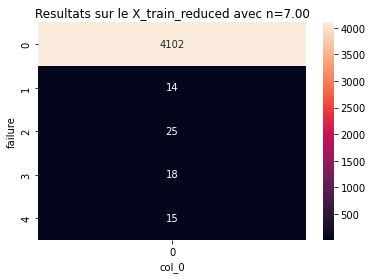

In [52]:
f2_score = []
score = []
n_range = range(1, 50, 2)
for n in n_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    knn_classifier.fit(X_train_reduced, y_train_reduced)
    y_pred = knn_classifier.predict(X_test)
    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(knn_classifier.score(X_test, y_test))

plt.figure(figsize=(12, 7));
plt.plot(n_range, score, label='mse');
plt.plot(n_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();

best_n = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour n = {:.2f}'.format(f2_score[best_n], n_range[best_n]))

knn_classifier = KNeighborsClassifier(n_neighbors= n_range[best_n], weights='distance')
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');
plt.title('Resultats sur le X_train_reduced avec n={:.2f}'.format(n_range[best_n]));

Ce classifieur donne un meilleur score une fois entrainé sur le jeu de données réduit mais a tendance à tout classifier dans la même classe.

### Classifieurs non linéaires
### 2. Linear Discriminant Analysis

Fb score avec X_train: 0.29
Fb score avec X_train_reduced: 0.38


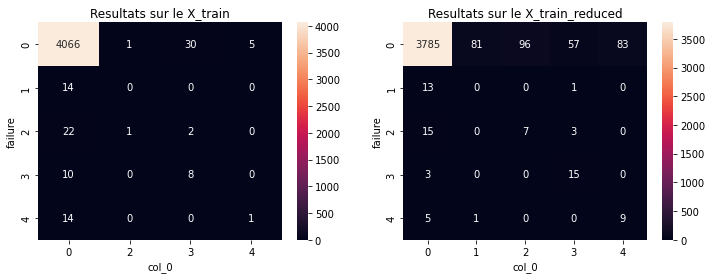

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
y_pred = lda_classifier.predict(X_test)

fig = plt.figure(figsize=(12,4))
axes = fig.subplots(nrows=1, ncols=2)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', ax=axes[0]) ;
axes[0].set_title('Resultats sur le X_train');
print('Fb score avec X_train: {:.2f}'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

lda_classifier.fit(X_train_reduced, y_train_reduced)
y_pred = lda_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', ax=axes[1]);
axes[1].set_title('Resultats sur le X_train_reduced');

print('Fb score avec X_train_reduced: {:.2f}'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))

Ce classifieur retourne un résultat plutôt bon comparé aux autres algorithmes. On constate de plus une amélioration des résultats avec le jeu de données réduit. Ce classifieur ne necessaite de plus pas d'ajuster des paramètres.

### Classifieurs linéaires
### 1. SGDClassifier

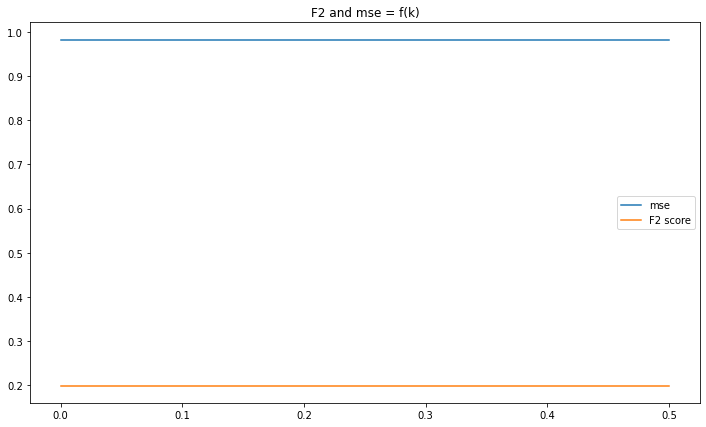

Meilleur Fb score : 0.20 optenu pour alpha = 0.00


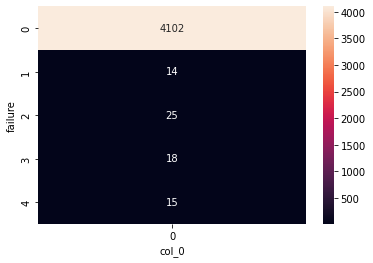

In [48]:
from sklearn.linear_model import SGDClassifier

f2_score = []
score = []
a_range = np.linspace(1e-5, 0.5, num=100)
for a in a_range:
    sgdc_classifier = SGDClassifier(alpha=a)
    sgdc_classifier.fit(X_train, y_train)
    y_pred = sgdc_classifier.predict(X_test)

    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(sgdc_classifier.score(X_test, y_test))

plt.figure(figsize=(12, 7));
plt.plot(s_range, score, label='mse');
plt.plot(s_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();

best_a = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour alpha = {:.2f}'.format(f2_score[best_a], a_range[best_a]))

sgdc_classifier = SGDClassifier(penalty='elasticnet', alpha=a_range[best_a])
sgdc_classifier.fit(X_train, y_train)
y_pred = sgdc_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');

Ce classifieur semble tout attribuer à la classe majoritaire. Voyons sont comportement sur le jeu de données réduit.

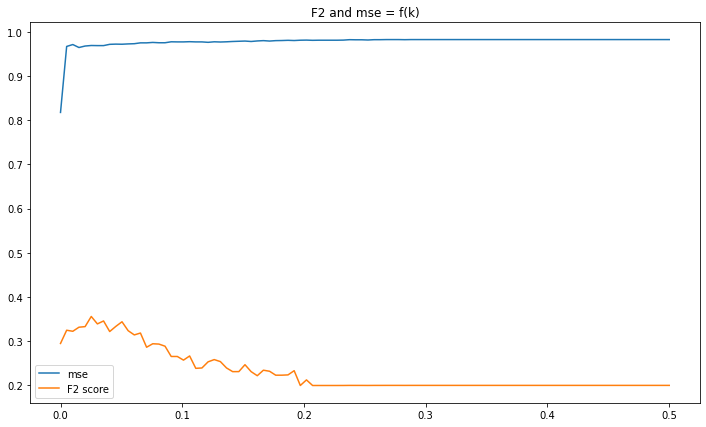

Meilleur Fb score : 0.36 optenu pour alpha = 0.03


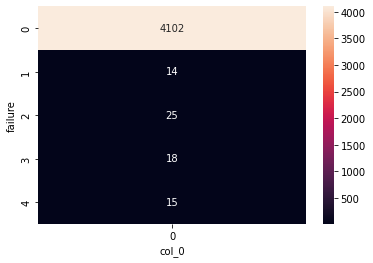

In [49]:
f2_score = []
score = []
a_range = np.linspace(1e-5, 0.5, num=100)
for a in a_range:
    sgdc_classifier = SGDClassifier(alpha=a)
    sgdc_classifier.fit(X_train_reduced, y_train_reduced)
    y_pred = sgdc_classifier.predict(X_test)

    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(sgdc_classifier.score(X_test, y_test))

plt.figure(figsize=(12, 7));
plt.plot(s_range, score, label='mse');
plt.plot(s_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();

best_a = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour alpha = {:.2f}'.format(f2_score[best_a], a_range[best_a]))

sgdc_classifier = SGDClassifier(penalty='elasticnet', alpha=a_range[best_a])
sgdc_classifier.fit(X_train, y_train)
y_pred = sgdc_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');

Encore une fois, le classifieur semble tout attribuer à la classe majoritaire.

### Classifieurs linéaires
### 2. Logistic Regression

Ce classifieur permet d'ajouter un paramètre de poids, nous allons donc tester plusieurs valeurs poids sur la classe majoritaire 0.

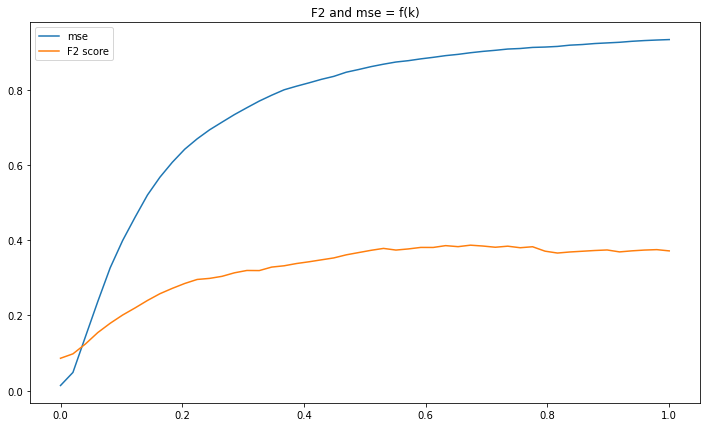

Meilleur Fb score : 0.39 optenu pour alpha = 0.67


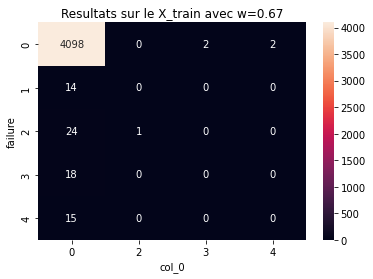

In [86]:
from sklearn.linear_model import LogisticRegression

f2_score = []
score = []
w_range = np.linspace(1e-5, 1, num=50)
for w in w_range:
    lr_classifier = LogisticRegression(class_weight={0: w})
    lr_classifier.fit(X_train_reduced, y_train_reduced)
    y_pred = lr_classifier.predict(X_test)

    f2_score.append((fbeta_score(y_test, y_pred, average='macro', beta=2)))
    score.append(lr_classifier.score(X_test, y_test))

plt.figure(figsize=(12, 7));
plt.plot(w_range, score, label='mse');
plt.plot(w_range, f2_score, label='F2 score');
plt.legend();
plt.title('F2 and mse = f(k)');
plt.show();


best_w = np.argmax(f2_score)
print('Meilleur Fb score : {:.2f} optenu pour w = {:.2f}'.format(f2_score[best_w], w_range[best_w]))

lr_classifier =  LogisticRegression(class_weight={0: w_range[best_w]})
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');
plt.title('Resultats sur le X_train avec w={:.2f}'.format(w_range[best_w]));

On constate que le meilleur score f2 ne correspond pas forcément à la meileur classification. En ajustant les paramètres à la main, on obtient de bons résultats pour un poids en 0 autour de 0.1 

Fb score : 0.30 optenu pour w = 0.1


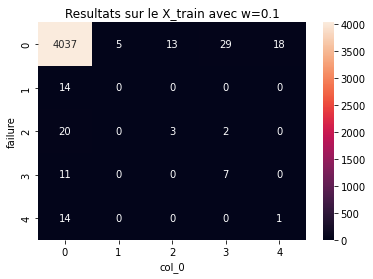

In [95]:
lr_classifier =  LogisticRegression(class_weight={0: 0.1})
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d');
plt.title('Resultats sur le X_train avec w=0.1');

print('Fb score : {:.2f} optenu pour w = 0.1'.format(fbeta_score(y_test, y_pred, average='macro', beta=2)))